### Handwritten Digit Image Generator 

In [1]:
pip install tensorflow==2.7.0
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**importing all necessary libraries**

**TensorFlow Version**

In [3]:
print(tf.version.VERSION)

2.7.0


**Load MNIST Data from Keras**

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

**Sample MNIST Image**

In [6]:
print(train_images[5672])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   5 130 196 228 170  86   5   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  30 210 254 254 243 254 254 215  54
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  26 230 254 210 121  26  68 18

**Normalising MNIST DataSet **

In [7]:
train_images=train_images/255

**Shape of DataSet**

In [8]:
print(train_images.shape)

(60000, 28, 28)


**images after Normalisation**

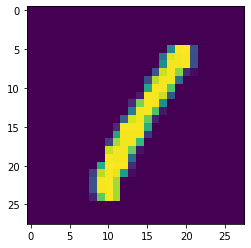

In [9]:
plt.imshow(train_images[3])

**Creation of tensor slices in order to shuffle dataset**

In [10]:
training_dataset = tf.data.Dataset.from_tensor_slices(train_images)

**Shuffling the dataset with buffer size of 60,000 since MNIST has 60000 images**

In [11]:
training_dataset = training_dataset.shuffle(60000, reshuffle_each_iteration=True)

**Creation of Batches with batch size as 100**

In [12]:
training_dataset = training_dataset.batch(100)

**Iteration over training Data Set**

In [13]:
for i, epoch in enumerate(range(5)):
    for j, batch in enumerate(training_dataset):
      print(f"{j} / {len(training_dataset)} steps completed in epoch {i}\r")  

0 / 600 steps completed in epoch 0
1 / 600 steps completed in epoch 0
2 / 600 steps completed in epoch 0
3 / 600 steps completed in epoch 0
4 / 600 steps completed in epoch 0
5 / 600 steps completed in epoch 0
6 / 600 steps completed in epoch 0
7 / 600 steps completed in epoch 0
8 / 600 steps completed in epoch 0
9 / 600 steps completed in epoch 0
10 / 600 steps completed in epoch 0
11 / 600 steps completed in epoch 0
12 / 600 steps completed in epoch 0
13 / 600 steps completed in epoch 0
14 / 600 steps completed in epoch 0
15 / 600 steps completed in epoch 0
16 / 600 steps completed in epoch 0
17 / 600 steps completed in epoch 0
18 / 600 steps completed in epoch 0
19 / 600 steps completed in epoch 0
20 / 600 steps completed in epoch 0
21 / 600 steps completed in epoch 0
22 / 600 steps completed in epoch 0
23 / 600 steps completed in epoch 0
24 / 600 steps completed in epoch 0
25 / 600 steps completed in epoch 0
26 / 600 steps completed in epoch 0
27 / 600 steps completed in epoch 0
28

**Importing all Layers from Tensorflow**

In [14]:
from tensorflow.keras.layers import *

**Creation of Descrimator Model**

In [15]:
def DescriminatorModel():
 inp = Input((28,28,1))
 x = Conv2D(filters = 16, kernel_size=3, strides=2, padding="same")(inp) 
 x = Activation("sigmoid")(x)
 x=Dropout(0.1)(x)
 x = Conv2D(filters = 64, kernel_size=3, strides=2, padding="same")(x) 
 x = Activation("sigmoid")(x)
 x=Dropout(0.1)(x)
 x = Flatten()(x) 
 x = Dense(1568)(x) 
 x = Activation("sigmoid")(x)
 x = Dense(1, activation="sigmoid")(x)
 model = tf.keras.Model(inputs=(inp), outputs=(x))
 model.summary()
 return model

**Creation of Generator Model**

In [16]:
def GeneratorModel():
 inp = Input((80))
 x = Dense(7*7*256)(inp)
 x = Reshape((7,7,256))(x) 
 x = Activation("sigmoid")(x)

 
 x = Conv2DTranspose(filters = 128, kernel_size=3, strides=2, padding="same",activation="sigmoid")(x)

 
 
 x=Conv2DTranspose(filters=64,kernel_size=3,strides=2,padding="same",activation="sigmoid")(x)

 

 x = Conv2D(filters=1,kernel_size=3, strides=1, padding="same",activation="sigmoid")(x)

 
 model = tf.keras.Model(inputs=(inp), outputs=(x))
 return model

**Testing Generator model by passing training as false parameter with random noise of (100,80)**

In [17]:
generator=GeneratorModel() 
noise=tf.random.normal([100,80])
generated_image = generator(noise,training=False)

**Generator Summary**

In [18]:
generator.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80)]              0         
                                                                 
 dense (Dense)               (None, 12544)             1016064   
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 activation (Activation)     (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      295040    
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 64)       73792     
 ranspose)                                                   

In [19]:
generator.save_weights("filename.ckpt")

**Test Image Generated from Generator when sample random noise is passed and traning is set to false**

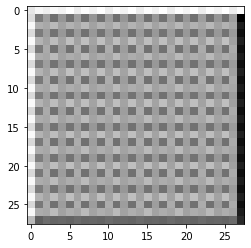

In [20]:
plt.imshow(generated_image[0,:,:,0],cmap='gray')

**Passing sample test image produced from above generator to discriminator for testing**

In [21]:
discriminator=DescriminatorModel()
descision=discriminator(generated_image)
print(descision)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 activation_1 (Activation)   (None, 14, 14, 16)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          9280      
                                                                 
 activation_2 (Activation)   (None, 7, 7, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0   

**Descriminator Summary**

In [36]:
discriminator.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 activation_1 (Activation)   (None, 14, 14, 16)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          9280      
                                                                 
 activation_2 (Activation)   (None, 7, 7, 64)          0         
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0   

In [22]:
from tensorflow.keras import backend as K

**Adam momentum-based optimizer for each of the
discriminator and the generator.**

In [23]:
discOpt = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.0, beta_2=0.99)
genOpt = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.0, beta_2=0.99)

**Generator Loss Function**

In [24]:
def genLossFunc(Disc_Output):
     return K.mean(tf.math.log(1-Disc_Output))


**Discriminator Loss function**

In [25]:
def DiscLossFunc(Gen_Output,Real_Output):
     return K.mean(tf.math.log(Real_Output)+tf.math.log(1-Gen_Output))*-1

**Training Step Function**

In [26]:
#@tf.function
def trainingStep(images, noise):
    with tf.GradientTape() as genTape, tf.GradientTape() as discTape:
      generated_images=generator(noise,training=True)

      real_output=discriminator(images,training=True)
      fake_output=discriminator(generated_images,training=True)

      gen_loss=genLossFunc(fake_output)
      disc_loss=DiscLossFunc(fake_output,real_output)

      genGradients = genTape.gradient(gen_loss, generator.trainable_variables)
      genOpt.apply_gradients(zip(genGradients,generator.trainable_variables))

      discGradients = discTape.gradient(disc_loss, discriminator.trainable_variables)
      discOpt.apply_gradients(zip(discGradients,discriminator.trainable_variables))
      
      
      return(generated_images,K.mean(gen_loss),K.mean(disc_loss),real_output,fake_output)

**Function to Save Image for a given batch in 10*10 figure size with total 100 images**

In [27]:
def DisplayImages(genimages,epoch):
  fig = plt.figure(figsize=(10,10))
  for k in range(100):
        ax = fig.add_subplot(10,10,k+1)
        im = np.clip(genimages[k], 0.0, 1.0).squeeze() * 255
        ax.set_title(f"({k})",fontsize=10)
        ax.imshow(im, cmap="gray", vmin=0, vmax=255)
        ax.axis('off')
        f="Output_Image_epoch-"+str(epoch)
  fig.savefig(f)
  plt.close(fig)

**Functions to Save and Load Weights**

In [29]:
def save_weights(epoch):
 generator.save_weights("Generator_weights-"+str(epoch)+".ckpt")
 discriminator.save_weights("Discriminator_weights-"+str(epoch)+".ckpt")

In [39]:
def load_weights(filename_gen,filename_disc):
  generator.load_weights(filename_gen)
  discriminator.load_weights(filename_disc)

**Training Both Generator and Discriminator models with 65 epochs**

In [31]:
for i, epoch in enumerate(range(100)):
  gen_loss_list=[]
  dis_loss_list=[]
  for j, batch in enumerate(training_dataset):
      noise=np.random.normal(0,1,size=(100,80))
      (genimages,gen_loss,disc_loss,real_output,fake_output)=trainingStep(batch,noise)
      gen_loss_list.append(gen_loss)
      dis_loss_list.append(disc_loss)
  print(f'epoch-{i} Generateorloss average is')
  print(tf.math.reduce_mean(gen_loss_list))
  print(f'epoch-{i} Discriminatorloss average is')
  print(tf.math.reduce_mean(dis_loss_list))
  print("\n")
  if(i%5==0):
    save_weights(i)
  DisplayImages(genimages,i)
  print(f'epoch {i} is completed') 
  print("\n")

epoch-0 Generateorloss average is
tf.Tensor(-0.69421446, shape=(), dtype=float32)
epoch-0 Discriminatorloss average is
tf.Tensor(1.3926866, shape=(), dtype=float32)


epoch 0 is completed


epoch-1 Generateorloss average is
tf.Tensor(-0.66943735, shape=(), dtype=float32)
epoch-1 Discriminatorloss average is
tf.Tensor(1.3440245, shape=(), dtype=float32)


epoch 1 is completed


epoch-2 Generateorloss average is
tf.Tensor(-0.5866109, shape=(), dtype=float32)
epoch-2 Discriminatorloss average is
tf.Tensor(1.2031455, shape=(), dtype=float32)


epoch 2 is completed


epoch-3 Generateorloss average is
tf.Tensor(-0.6664035, shape=(), dtype=float32)
epoch-3 Discriminatorloss average is
tf.Tensor(1.3449905, shape=(), dtype=float32)


epoch 3 is completed


epoch-4 Generateorloss average is
tf.Tensor(-0.6923997, shape=(), dtype=float32)
epoch-4 Discriminatorloss average is
tf.Tensor(1.3868821, shape=(), dtype=float32)


epoch 4 is completed


epoch-5 Generateorloss average is
tf.Tensor(-0.696680

In [34]:
#import shutil
#shutil.make_archive('/content', 'zip', '/content')

'/content.zip'